# Q1 - Visualize Macaw

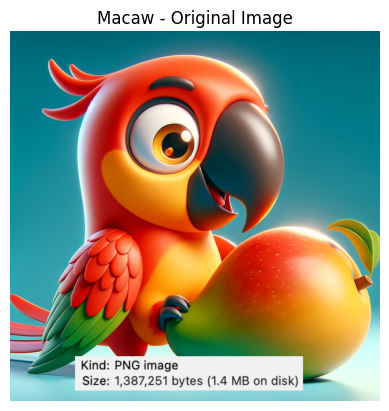

In [1]:
import matplotlib.pyplot as plt
from skimage import io

img_path = 'Macaw.webp'
img = io.imread(img_path)

plt.imshow(img)
plt.title('Macaw - Original Image')
plt.axis('off')
plt.show()



# Q2 Image Segmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


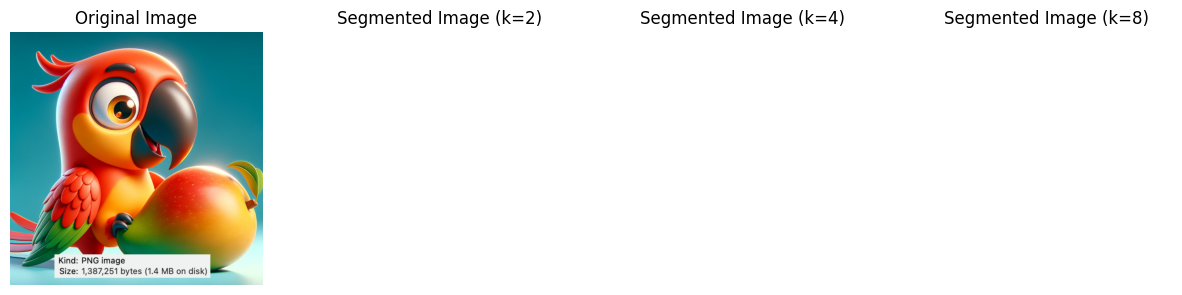

In [ ]:
# 1. Flatten the image, each row represents a pixels rgb values
img_flatten = img.reshape(-1, 3)

# 2. Perform KMeans clustering for k=2, 4, 8
from sklearn.cluster import KMeans
k_values = [2, 4, 8]
kmeans_models = []
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0).fit(img_flatten)
    kmeans_models.append(kmeans)

# 3. Replace each pixels rgb value with the centroid to creater a segmented image
segmented_imgs = []
for kmeans in kmeans_models:
    segmented_img = kmeans.cluster_centers_[kmeans.labels_.astype(int)]
    segmented_imgs.append(segmented_img.reshape(img.shape))

# 4. Display the segmented images along with the original image
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title('Original Image')
axes[0].axis('off')

for i, k in enumerate(k_values):
    axes[i+1].imshow(segmented_imgs[i])
    axes[i+1].set_title(f'Segmented Image (k={k})')
    axes[i+1].axis('off')
